# Village consumption smoothing 

We simulate T periods of income for N individuals.  Each individual receives a base level of income plus an income shocks.  The income shocks can be independent or correlated.  

We plot income in each household with and without consumption smoothing. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, fixed, FloatSlider
%matplotlib inline

#### Default parameters

In [2]:
rho = 0   
N = 5
T = 15
V = 1

In [3]:
def shocks(rho=0, N=N, T=T):
    '''Returns an N by T matrix of multivariate normally distributed shocks with correlation rho'''
    mean = np.zeros(N)
    cov = np.ones((N, N), int)*rho*V
    np.fill_diagonal(cov, V)
    #print(cov)
    e = np.random.multivariate_normal(mean, cov, size=T)
    return e

In [4]:
def incomes(rho=0, V=V, N = N, T=T):
    '''Generates random incomes for N over T periods'''
    t = np.arange(T)   # time periods
    x0 = np.arange(10,10+N*5,5)   # average income
    e = shocks(rho=rho, N=N, T=T)*V
    X = x0 + e
    
    XT = np.sum(X, axis = 1)
    
    w = x0/np.sum(x0)
    XS = np.array([XT * wt for wt in w]).T
    
    return t, X, XS

In [5]:
def plot_cons(rho=0, V=1):
    #print('rho = {}'.format(rho))
    t, X, XS = incomes(rho=rho, V=V, N=N, T=T)
    fig, ax = plt.subplots(figsize=(10,8))
    ax.plot(t, X,'x-')
    ax.plot(t,XS,linestyle='dashed')
    ax.set_xlabel('time')
    ax.set_xticks(np.arange(T, step=1))
    fig.suptitle(r'$\rho = {:0.2f}$'.format(rho))
    ax.grid()
    plt.tight_layout();

In [6]:
interact(plot_cons, rho=(-0.25,0.99,0.05));

interactive(children=(FloatSlider(value=0.0, description='rho', max=0.99, min=-0.25, step=0.05), IntSlider(val…

## Examples 

We illustrate with three different scenarios.  Remember that these are random draws so will be different everytime these are run.

### independent incomes

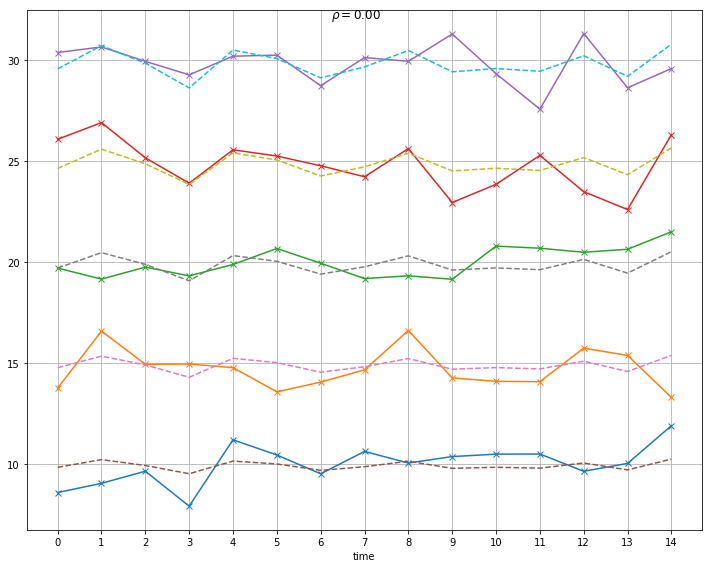

In [7]:
plot_cons(rho=0, V=1)

### Correlated incomes

Less opportunity for risk sharing. So consumption will tend to follow income. 

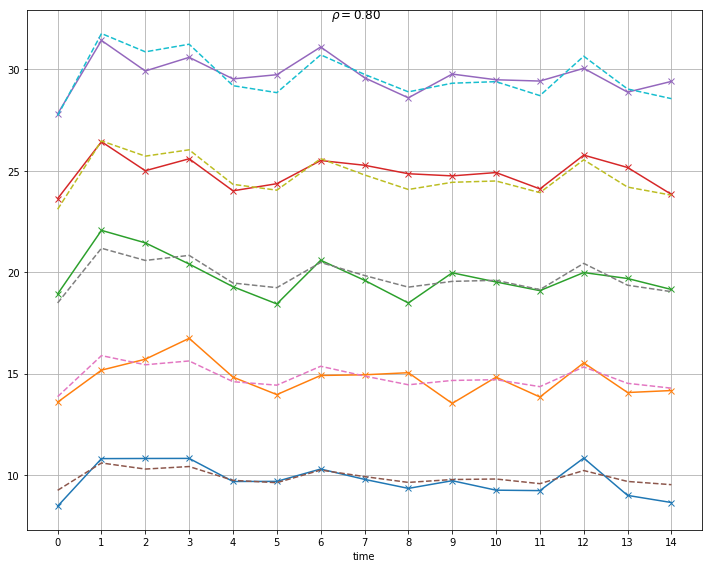

In [8]:
plot_cons(rho=0.8, V=1)

### Negatively correlated

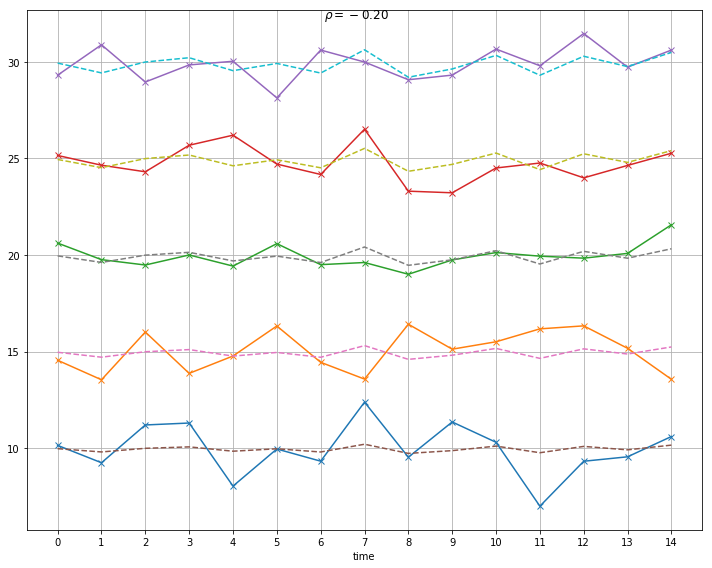

In [9]:
plot_cons(rho=-0.2, V=1)

## Unfinished explorations

In [10]:
import statsmodels.api as sm
import pandas as pd

In [11]:
t, X, XS = incomes(rho=rho, V=V, N=N, T=T)

In [12]:
X.sum(axis=1)

array([ 96.48713525, 102.52388657,  95.59625069,  99.23752789,
       102.97921897, 102.9646789 ,  97.92776505,  98.31891976,
        97.79669248, 104.13966196, 102.80602178, 102.35925504,
       103.30973225,  98.94020573, 101.56148769])

In [13]:
XC = XS.reshape((N*T,1))
XI = X.reshape((N*T,1))

In [14]:
model = sm.OLS(XC,XI)
results = model.fit()
results.params

array([1.00009956])

Another way to draw from a multivariate normal

In [15]:
from scipy.spatial.distance import cdist
import scipy.linalg as spla

In [16]:
X = np.random.normal(size=(5,1))

In [17]:
K = np.exp(-cdist(X,X,"sqeuclidean")) +1e-6* np.eye(X.shape[0])

In [18]:
mean = np.array(np.arange(10,35,5))
mean

array([10, 15, 20, 25, 30])

In [19]:
def multivariate_normal_sampler(mean, covariance, n_samples=1):
    L = spla.cholesky(covariance)
    Z = np.random.normal(size=(n_samples, covariance.shape[0]))
    return Z.dot(L) + mean

In [20]:
multivariate_normal_sampler(mean, K, 10)

array([[10.00022265, 14.99984704, 19.84269132, 24.80253405, 30.21772645],
       [ 8.14020664, 13.13779819, 18.42152289, 25.12904769, 27.91364954],
       [ 9.30345646, 14.30362781, 19.18663924, 26.00823541, 29.55851841],
       [10.21195227, 15.21460846, 20.01027267, 23.71203423, 30.45393902],
       [10.20517868, 15.20595535, 20.04502097, 24.16611746, 30.39342473],
       [11.22043468, 16.21986802, 21.33605951, 25.03484487, 31.03712728],
       [ 8.36539519, 13.3692188 , 18.2409388 , 23.71813503, 28.55003665],
       [11.12858787, 16.13601875, 20.7658459 , 24.44160974, 31.57866478],
       [10.32707882, 15.32426831, 20.55303682, 25.66671282, 29.99576211],
       [11.38865009, 16.39063115, 21.16456261, 24.81590126, 31.55425093]])